In [1]:
import io
import requests
from PIL import Image
import matplotlib.pyplot as plt
import torch 
from torch import nn 
from torch import optim
import torch.nn.functional as F
import torchvision
from torchvision import models, transforms, datasets, utils
from torch.autograd import Variable
import os
import argparse 
import numpy as np
import time 
import copy 
from torch.optim import lr_scheduler
from torch import cuda

from __future__ import print_function, division





class SimpleCNN(torch.nn.Module):
    
    #Our batch shape for input x is (3, 32, 32)
    
    def __init__(self):
        super(SimpleCNN, self).__init__()
        
        #Input channels = 3, output channels = 18
        self.conv1 = torch.nn.Conv2d(3, 18, kernel_size=3, stride=1, padding=1)
        self.pool = torch.nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        
        #4608 input features, 64 output features (see sizing flow below)
        self.fc1 = torch.nn.Linear(18 * 16 * 16, 64)
        
        #64 input features, 10 output features for our 10 defined classes
        self.fc2 = torch.nn.Linear(64, 10)
        
    def forward(self, x):
        
        #Computes the activation of the first convolution
        #Size changes from (3, 32, 32) to (18, 32, 32)
        x = F.relu(self.conv1(x))
        
        #Size changes from (18, 32, 32) to (18, 16, 16)
        x = self.pool(x)
        
        #Reshape data to input to the input layer of the neural net
        #Size changes from (18, 16, 16) to (1, 4608)
        #Recall that the -1 infers this dimension from the other given dimension
        x = x.view(-1, 18 * 16 *16)
        
        #Computes the activation of the first fully connected layer
        #Size changes from (1, 4608) to (1, 64)
        x = F.relu(self.fc1(x))
        
        #Computes the second fully connected layer (activation applied later)
        #Size changes from (1, 64) to (1, 10)
        x = self.fc2(x)
        return(x)
    
import fnmatch
import os

for file in os.listdir('.'):
    if fnmatch.fnmatch(file, '*.txt'):
        print(file)

In [153]:
from __future__ import print_function
# build thumbnails of all images in a directory
import sys
import os
import glob
import matplotlib.image as image



outdir = 'C:/Users/gdiankov/Documents/chest_xray/thumbs/'
if not os.path.exists(outdir):
    os.makedirs(outdir)
    
indir = 'C:/Users/gdiankov/Documents/chest_xray/indir/'


    
from PIL import Image
import glob, os

size = 128, 128

for infile in glob.glob(os.path.join(indir, '*.jpeg')):
    file, ext = os.path.splitext(infile)
    im = Image.open(infile)
    im.thumbnail(size)
    im.show()
    im.save(file + ".thumbnail", "JPEG")
    


There are 5877 total X-ray images, with 4786 training images within which 1341 "normal" images
 1202 images with viral pneumonia and 2223 images with bacterial pneumonia.


tensor([[[-1.0048, -1.0390, -1.0733,  ..., -0.5767, -0.5082, -0.4911],
         [-0.9877, -1.0390, -1.0390,  ..., -0.5424, -0.4739, -0.4226],
         [-1.0219, -1.0219, -1.0048,  ..., -0.5253, -0.4568, -0.4568],
         ...,
         [-0.2171, -0.2856, -0.2171,  ...,  0.0056, -0.0458, -0.0458],
         [-0.3027, -0.3027, -0.2684,  ...,  0.0398, -0.0116, -0.0458],
         [-0.3541, -0.3369, -0.2513,  ...,  0.0569,  0.0227, -0.0629]],

        [[-0.8978, -0.9328, -0.9678,  ..., -0.4601, -0.3901, -0.3725],
         [-0.8803, -0.9328, -0.9328,  ..., -0.4251, -0.3550, -0.3025],
         [-0.9153, -0.9153, -0.8978,  ..., -0.4076, -0.3375, -0.3375],
         ...,
         [-0.0924, -0.1625, -0.0924,  ...,  0.1352,  0.0826,  0.0826],
         [-0.1800, -0.1800, -0.1450,  ...,  0.1702,  0.1176,  0.0826],
         [-0.2325, -0.2150, -0.1275,  ...,  0.1877,  0.1527,  0.0651]],

        [[-0.6715, -0.7064, -0.7413,  ..., -0.2358, -0.1661, -0.1487],
         [-0.6541, -0.7064, -0.7064,  ..., -0

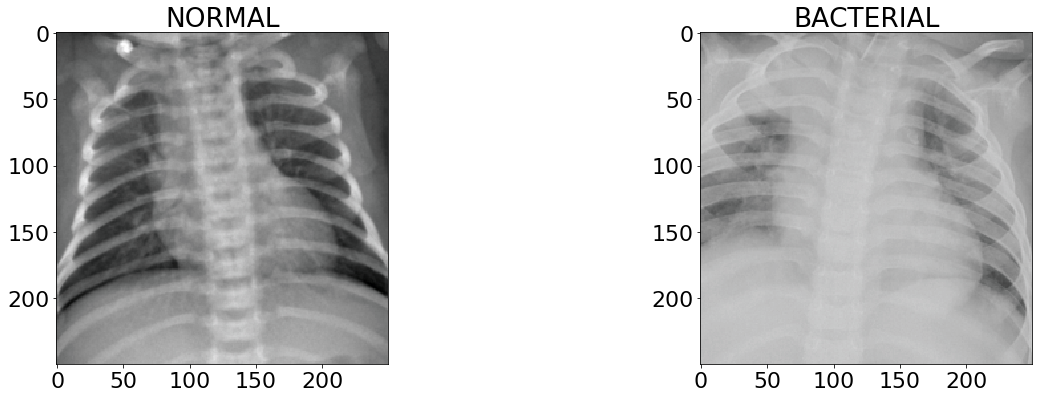

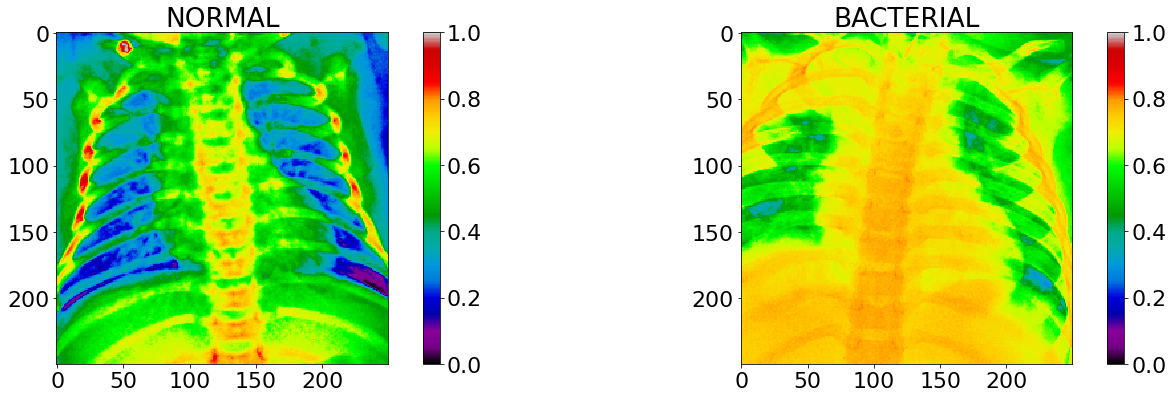

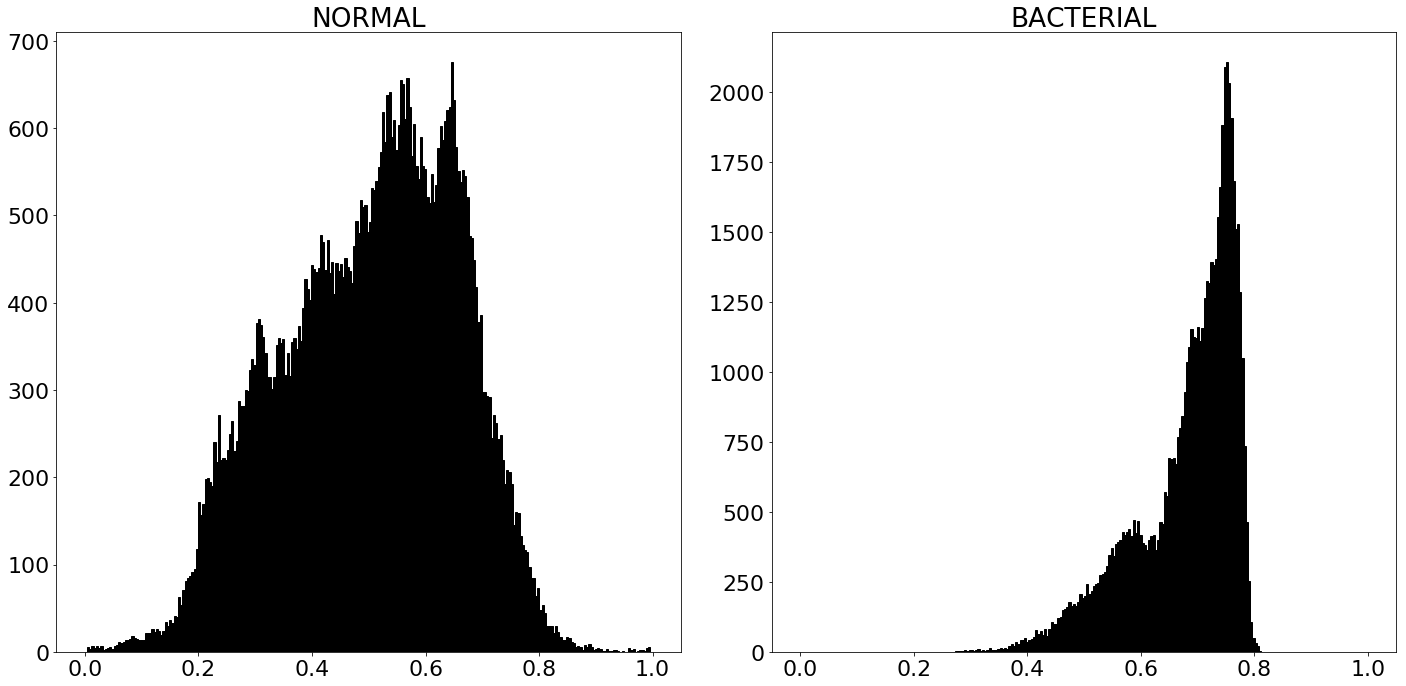

In [4]:
import io
import requests
from PIL import Image
import matplotlib.pyplot as plt
import torch 
from torch import nn 
from torch import optim
import torch.nn.functional as F
import torchvision
from torchvision import models, transforms, datasets, utils
from torch.autograd import Variable
import os
import argparse 
import numpy as np
import time 
import copy 
from torch.optim import lr_scheduler
from torch import cuda
import sys
import os
import glob
import matplotlib.image as image

from __future__ import print_function, division

from glob import * 

plt.ion()   # interactive mode



%matplotlib inline

data_dir = 'C:/Users/gdiankov/Documents/chest_xray/'
train_dir = data_dir + 'train/'
val_dir = data_dir + 'val/'
test_dir = 'test/'






# TODO: Define your transforms for the training, validation, and testing sets

data_train_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(250),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

data_val_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(250),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])



train_dataset = torchvision.datasets.ImageFolder(train_dir, transform = data_train_transforms)
trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=2, shuffle=True)
class_names = train_dataset.classes

val_dataset = torchvision.datasets.ImageFolder(val_dir, transform = data_val_transforms)
validloader = torch.utils.data.DataLoader(val_dataset, batch_size=5, shuffle=True)

test_dataset = torchvision.datasets.ImageFolder(test_dir, transform = data_val_transforms)
testloader = torch.utils.data.DataLoader(test_dataset, batch_size=5, shuffle=True)

train_datasets_size = len(train_dataset)

normal = os.path.join(train_dir, 'NORMAL/')
bacterial = os.path.join(train_dir, 'BACTERIAL/')
viral = os.path.join(train_dir, 'VIRAL/')


print('There are %d total X-ray images,' % (len(train_dataset) + len(val_dataset) + len(test_dataset)),
      'with %d training images' % len(train_dataset),
      'within which %d "normal" images\n' % len([name for name in os.listdir(normal) 
                                                 if os.path.isfile(os.path.join(normal, name))]),
      '%d images with viral pneumonia' % len([name for name in os.listdir(viral) if os.path.isfile(os.path.join(viral, name))]),
      'and %d images with bacterial pneumonia.' % len([name for name in os.listdir(bacterial) 
                                                       if os.path.isfile(os.path.join(bacterial, name))]))



dataiter = iter(trainloader)
images, labels = dataiter.next()



    
plt.rcParams.update({'font.size': 22})

def imshow0(images, labels):
    fig = plt.figure(figsize = (20,6))
    fig.patch.set_facecolor('white')
    image_mean = [0.485, 0.456, 0.406]
    image_std = [0.229, 0.224, 0.225]
    for i in range(len(images)):
        img = images[i].numpy()
        img = img.transpose((1, 2, 0))
        img = image_std * img + image_mean
        img = np.clip(img, 0, 1)
        ax = plt.subplot(1, 2, i+1)
        ax.set_title(class_names[labels[i]])
        plt.imshow(img, vmin = 0, vmax = 1)
    plt.tight_layout()
    plt.savefig('grid_grayscale5.png', facecolor = fig.get_facecolor(), transparent = False)

def imshow(images, labels):
    fig = plt.figure(figsize = (20,6))
    fig.patch.set_facecolor('white')
    image_mean = [0.485, 0.456, 0.406]
    image_std = [0.229, 0.224, 0.225]
    for i in range(len(images)):
        img = images[i].numpy()
        img = img.transpose((1, 2, 0))
        img = image_std * img + image_mean
        img = np.clip(img, 0, 1)
        img = img[:,:,0]
        ax = plt.subplot(1, 2, i+1)
        ax.set_title(class_names[labels[i]])
        plt.imshow(img, vmin = 0, vmax = 1, cmap = 'nipy_spectral')
        plt.colorbar()
    plt.tight_layout()
    plt.savefig('grid_false_color5.png', facecolor = fig.get_facecolor(), transparent = False)


def imshow2(images, labels):
    fig2 = plt.figure(figsize = (20,10))
    fig2.patch.set_facecolor('white')
    image_mean = [0.485, 0.456, 0.406]
    image_std = [0.229, 0.224, 0.225]
    for i in range(len(images)):
        img = images[i].numpy()
        img = img.transpose((1, 2, 0))
        img = image_std * img + image_mean
        img = np.clip(img, 0, 1)
        img = img[:,:,0]
        ax = plt.subplot(1, 2, i+1)
        ax.set_title(class_names[labels[i]])
        #plt.imshow(img, vmin = 0, vmax = 1, cmap = 'nipy_spectral')
        #plt.colorbar()
        #ax = plt.subplot(2,2,i+2)
        plt.hist(img.ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k')
    plt.tight_layout()
    plt.savefig('grid_hist5.png', facecolor = fig2.get_facecolor(), transparent = False)
    return img


    
    
imshow0(images, labels)  
imshow(images, labels)
imshow2(images, labels)
#model = models.densenet201(pretrained=False)
model = models.vgg16(pretrained=True)

for param in model.parameters():
    param.requires_grad = False
    
    

from collections import OrderedDict
classifier = nn.Sequential(nn.Linear(25088, 512),
                           nn.ReLU(inplace=True),
                           nn.Dropout(0.5),
                           nn.Linear(512, 256),
                           nn.ReLU(inplace=True),
                           nn.Dropout(0.5),
                           nn.Linear(256, 128),
                           nn.ReLU(inplace=True),
                           nn.Dropout(0.5),
                           nn.Linear(128, 64),
                           nn.ReLU(inplace=True),
                           nn.Dropout(0.5),
                           nn.Linear(64, 2),
                           nn.ReLU(inplace=True),
                           nn.Dropout(0.5),
                           nn.LogSoftmax(dim=1))



    
model.classifier = classifier

for param in model.classifier.parameters():
    param.requires_grad = True
    

    
out = torchvision.utils.make_grid(images, 10)

#imshow(out, title=[class_names[x] for x in labels])



def find_classes(dir):
    classes = [d for d in os.listdir(dir) if os.path.isdir(os.path.join(dir, d))]
    classes.sort()
    class_to_idx = {classes[i]: i for i in range(len(classes))}
    return classes, class_to_idx

find_classes(train_dir)

#for i, v in enumerate(cat_to_name):
   # print(i,v, class_names[i])

images[0]


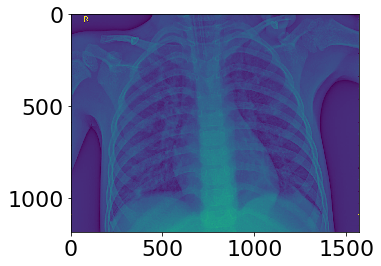

In [85]:
imgpil = np.array(Image.open('C:/Users/gdiankov/Documents/chest_xray/test/newviral\person14_virus_44.jpeg'))
plt.imshow(imgpil)


C:/Users/gdiankov/Documents/chest_xray/test/newviral\person10_virus_35.jpeg
C:/Users/gdiankov/Documents/chest_xray/test/newviral\person11_virus_38.jpeg
C:/Users/gdiankov/Documents/chest_xray/test/newviral\person14_virus_44.jpeg
C:/Users/gdiankov/Documents/chest_xray/test/newviral\person15_virus_46.jpeg
C:/Users/gdiankov/Documents/chest_xray/test/newviral\person16_virus_47.jpeg
C:/Users/gdiankov/Documents/chest_xray/test/newviral\person17_virus_48.jpeg
C:/Users/gdiankov/Documents/chest_xray/test/newviral\person18_virus_49.jpeg
C:/Users/gdiankov/Documents/chest_xray/test/newviral\person19_virus_50.jpeg
C:/Users/gdiankov/Documents/chest_xray/test/newviral\person1_virus_11.jpeg
C:/Users/gdiankov/Documents/chest_xray/test/newviral\person1_virus_12.jpeg
C:/Users/gdiankov/Documents/chest_xray/test/newviral\person1_virus_13.jpeg
C:/Users/gdiankov/Documents/chest_xray/test/newviral\person1_virus_6.jpeg
C:/Users/gdiankov/Documents/chest_xray/test/newviral\person1_virus_7.jpeg
C:/Users/gdiankov/D

36

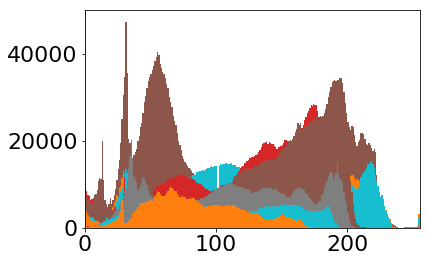

In [69]:
import matplotlib.pyplot as plt
import os
import glob

histvir = []
fig = plt.figure(1)
for infile in glob.glob(os.path.join('C:/Users/gdiankov/Documents/chest_xray/test/newviral/', '*.jpeg')):
    imgpil = np.array(Image.open(infile))
    plt.ylim = (0,50000)
    plt.hist(imgpil.ravel(), bins = 255)
    plt.axis([0,255,0,50000])
    histvir.append(plt.hist(imgpil.ravel(), bins = 255))
    print(infile)
    
len(histvir)
  

C:/Users/gdiankov/Documents/chest_xray/test/newnormal\IM-0001-0001.jpeg
C:/Users/gdiankov/Documents/chest_xray/test/newnormal\IM-0003-0001.jpeg
C:/Users/gdiankov/Documents/chest_xray/test/newnormal\IM-0005-0001.jpeg
C:/Users/gdiankov/Documents/chest_xray/test/newnormal\IM-0006-0001.jpeg
C:/Users/gdiankov/Documents/chest_xray/test/newnormal\IM-0007-0001.jpeg
C:/Users/gdiankov/Documents/chest_xray/test/newnormal\IM-0009-0001.jpeg
C:/Users/gdiankov/Documents/chest_xray/test/newnormal\IM-0010-0001.jpeg
C:/Users/gdiankov/Documents/chest_xray/test/newnormal\IM-0011-0001-0001.jpeg
C:/Users/gdiankov/Documents/chest_xray/test/newnormal\IM-0011-0001-0002.jpeg
C:/Users/gdiankov/Documents/chest_xray/test/newnormal\IM-0011-0001.jpeg
C:/Users/gdiankov/Documents/chest_xray/test/newnormal\IM-0013-0001.jpeg
C:/Users/gdiankov/Documents/chest_xray/test/newnormal\IM-0015-0001.jpeg
C:/Users/gdiankov/Documents/chest_xray/test/newnormal\IM-0016-0001.jpeg
C:/Users/gdiankov/Documents/chest_xray/test/newnormal\

34

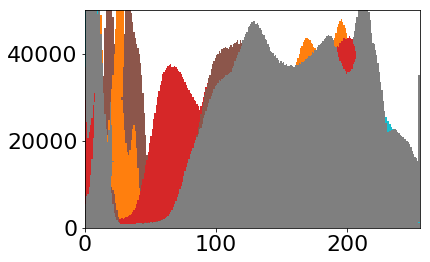

In [86]:
histnorm = []
fig = plt.figure(1)
for infile in glob.glob(os.path.join('C:/Users/gdiankov/Documents/chest_xray/test/newnormal/', '*.jpeg')):
    imgpil = np.array(Image.open(infile))
    plt.ylim = (0,50000)
    plt.hist(imgpil.ravel(), bins = 255)
    plt.axis([0,255,0,50000])
    histnorm.append(plt.hist(imgpil.ravel(), bins = 255))
    print(infile)
    
len(histnorm)
  

Text(0.5,0,'Bins')

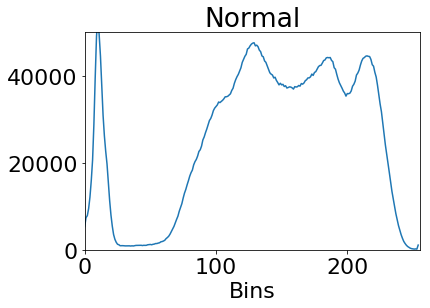

In [90]:
bucketsnorm = np.zeros(255)
for j in range(255):
    for i in range(len(histnorm)):
        bucketsnorm[j] = np.mean(histnorm[i][0][j])
        
plt.plot(range(255), bucketsnorm)
plt.axis([0,255,0,50000])
plt.title('Normal')
plt.xlabel('Bins')

In [70]:
bucketsvir = np.zeros(255)
len(bucketsvir)


255

Text(0.5,0,'Bins')

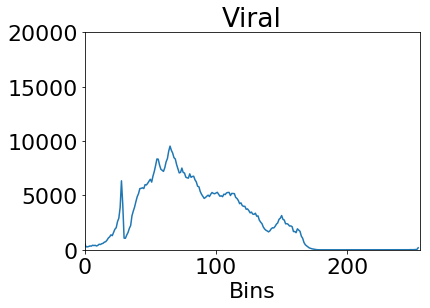

In [76]:
for j in range(255):
    for i in range(len(histvir)):
        bucketsvir[j] = np.mean(histvir[i][0][j])
        
plt.plot(range(255), bucketsvir)
plt.axis([0,255,0,20000])
plt.title('Viral')
plt.xlabel('Bins')

C:/Users/gdiankov/Documents/chest_xray/test/new\person78_bacteria_378.jpeg
C:/Users/gdiankov/Documents/chest_xray/test/new\person78_bacteria_380.jpeg
C:/Users/gdiankov/Documents/chest_xray/test/new\person78_bacteria_381.jpeg
C:/Users/gdiankov/Documents/chest_xray/test/new\person78_bacteria_382.jpeg
C:/Users/gdiankov/Documents/chest_xray/test/new\person78_bacteria_384.jpeg
C:/Users/gdiankov/Documents/chest_xray/test/new\person78_bacteria_385.jpeg
C:/Users/gdiankov/Documents/chest_xray/test/new\person78_bacteria_386.jpeg
C:/Users/gdiankov/Documents/chest_xray/test/new\person78_bacteria_387.jpeg
C:/Users/gdiankov/Documents/chest_xray/test/new\person80_bacteria_389.jpeg
C:/Users/gdiankov/Documents/chest_xray/test/new\person80_bacteria_390.jpeg
C:/Users/gdiankov/Documents/chest_xray/test/new\person80_bacteria_391.jpeg
C:/Users/gdiankov/Documents/chest_xray/test/new\person80_bacteria_392.jpeg
C:/Users/gdiankov/Documents/chest_xray/test/new\person80_bacteria_393.jpeg
C:/Users/gdiankov/Documen

38

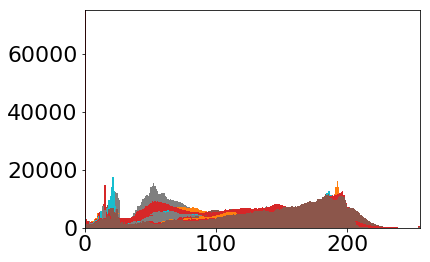

In [67]:
histbac = []
fig = plt.figure(1)
for infile in glob.glob(os.path.join('C:/Users/gdiankov/Documents/chest_xray/test/new/', '*.jpeg')):
    imgpil = np.array(Image.open(infile))
    plt.ylim = (0,75000)
    plt.hist(imgpil.ravel(), bins = 255)
    plt.axis([0,255,0,75000])
    histbac.append(plt.hist(imgpil.ravel(), bins = 255))
    print(infile)
    
len(histbac)
  

In [65]:
len(hist[0][0])

255

Text(0.5,0,'Bins')

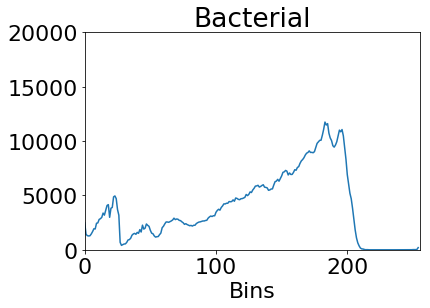

In [68]:
bucketsbac = np.zeros(255)
for j in range(255):
    for i in range(len(histbac)):
        bucketsbac[j] = np.mean(histbac[i][0][j])
        
plt.plot(range(255), bucketsbac)
plt.axis([0,255,0,20000])
plt.title('Bacterial')
plt.xlabel('Bins')

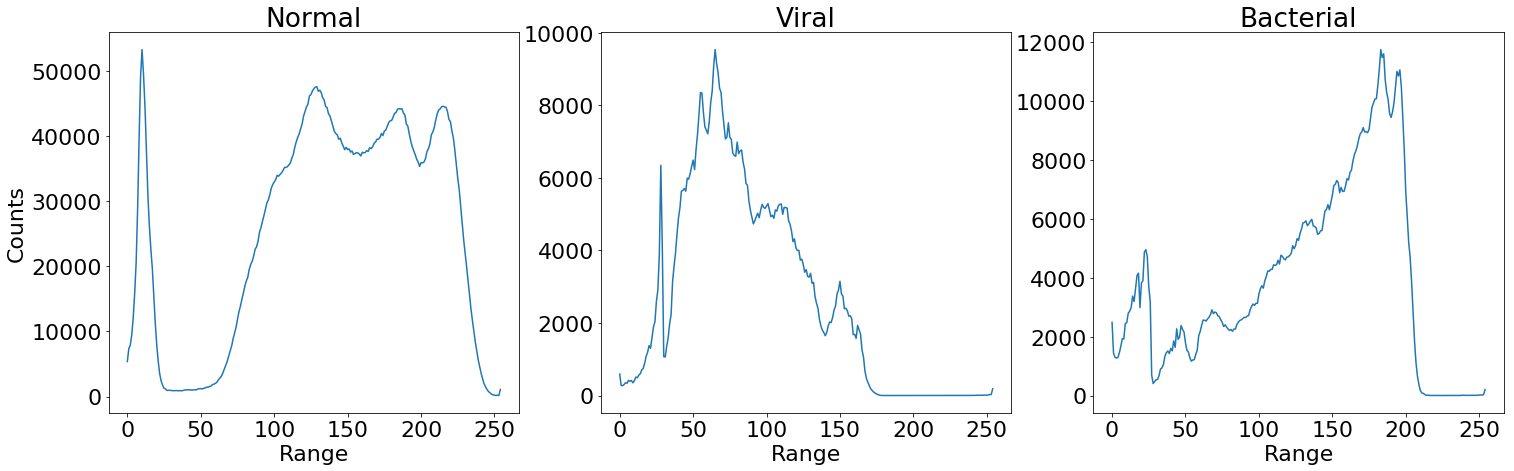

In [115]:
fighist = plt.figure(figsize = (25,7))
ax1 = fighist.add_subplot(1,3,1)
plt.plot(range(255), bucketsnorm)
plt.title('Normal')
plt.xlabel('Range')
plt.ylabel('Counts')
ax2 = fighist.add_subplot(1,3,2)
plt.plot(range(255), bucketsvir)
plt.title('Viral')
plt.xlabel('Range')
ax3 = fighist.add_subplot(1,3,3)
plt.plot(range(255), bucketsbac)
plt.title('Bacterial')
plt.xlabel('Range')
fighist.patch.set_facecolor('white')
plt.show()

plt.savefig('C:/Users/gdiankov/Documents/chest_xray/histograms_comparison.png', 
            facecolor = fighist.get_facecolor(), transparent = False)



In [4]:
#criterion = nn.CrossEntropyLoss().cuda()
criterion = nn.NLLLoss().cuda()
optimizer = optim.Adam(model.classifier.parameters(), lr=0.05)






scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)
running_corrects = 0.0
epochs = 5
print_every = 10
torch.cuda.device(0)
import time 
model.cuda()

loss_array = []
corrects_array = []

def train_model(model, criterion, optimizer, num_epochs=10):
    since = time.time()
    best_model_wts = copy.deepcopy(model.state_dict())
    
    for e in range(epochs):
    
        steps = 1
        running_loss = 0
        running_corrects = 0
    
        
        for ii, (images, labels) in enumerate(trainloader):
            model.train()
            inputs = Variable(images, requires_grad = True).cuda()
            targets = Variable(labels, requires_grad = True).cuda()
            optimizer.zero_grad()
            outputs = model.forward(inputs).cuda()
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            running_loss += float(loss)
            running_corrects += float(torch.sum(preds == targets).data)
            print("Epoch: {}/{}... ".format(e+1, epochs),"step: {}...".format(steps),
                  "Running loss... {}".format(running_loss),
                  "Running corrects...{}".format(running_corrects),
                  "Training loss:... {}.".format(loss.item()))
            
            if e ==0:
                loss_array.append(float(loss))
                corrects_array.append(running_corrects)
            
            steps += 1 
        
        accuracy = 0
        validation_loss = 0
        for ii, (images, labels) in enumerate(validloader):
            model.eval()
            inputs = Variable(images, requires_grad = False).cuda()
            targets = Variable(labels, requires_grad = False).cuda()
            output = model.forward(inputs).cuda()
            validation_loss += float(criterion(output, targets))
            ps = torch.exp(output).data
            equality = (targets.data == ps.max(1)[1])
            accuracy += equality.type_as(torch.FloatTensor()).mean()
            accuracy = float(accuracy)
            
        print("Validation Loss: {:.3f}.. ".format(validation_loss),
              "Validation Accuracy: {:.3f}".format(accuracy/len(validloader)))
   
        scheduler.step()
    
    time_elapsed = time.time() - since
    print(time_elapsed)
    model.load_state_dict(best_model_wts)
    torch.save(model.state_dict(), 'checkpoint_chest_xray2.pth')
    return model
train_model(model, criterion, optimizer, num_epochs=5)           
            
    



Epoch: 1/5...  step: 1... Running loss... 0.7232953310012817 Running corrects...1.0 Training loss:... 0.7232953310012817.
Epoch: 1/5...  step: 2... Running loss... 6.133326172828674 Running corrects...2.0 Training loss:... 5.410030841827393.
Epoch: 1/5...  step: 3... Running loss... 6.687843918800354 Running corrects...6.0 Training loss:... 0.5545177459716797.
Epoch: 1/5...  step: 4... Running loss... 7.380991101264954 Running corrects...7.0 Training loss:... 0.6931471824645996.
Epoch: 1/5...  step: 5... Running loss... 7.796879410743713 Running corrects...10.0 Training loss:... 0.41588830947875977.
Epoch: 1/5...  step: 6... Running loss... 7215.052250504494 Running corrects...12.0 Training loss:... 7207.25537109375.
Epoch: 1/5...  step: 7... Running loss... 7215.745397686958 Running corrects...13.0 Training loss:... 0.6931471824645996.
Epoch: 1/5...  step: 8... Running loss... 7216.438544869423 Running corrects...15.0 Training loss:... 0.6931471824645996.
Epoch: 1/5...  step: 9... Run

Epoch: 1/5...  step: 132... Running loss... 93615.09633600712 Running corrects...212.0 Training loss:... 0.6931471824645996.
Epoch: 1/5...  step: 133... Running loss... 93615.78948318958 Running corrects...212.0 Training loss:... 0.6931471824645996.
Epoch: 1/5...  step: 134... Running loss... 93616.48263037205 Running corrects...213.0 Training loss:... 0.6931471824645996.
Epoch: 1/5...  step: 135... Running loss... 93617.17577755451 Running corrects...214.0 Training loss:... 0.6931471824645996.
Epoch: 1/5...  step: 136... Running loss... 93617.86892473698 Running corrects...216.0 Training loss:... 0.6931471824645996.
Epoch: 1/5...  step: 137... Running loss... 93618.56207191944 Running corrects...218.0 Training loss:... 0.6931471824645996.
Epoch: 1/5...  step: 138... Running loss... 93619.2552191019 Running corrects...220.0 Training loss:... 0.6931471824645996.
Epoch: 1/5...  step: 139... Running loss... 93619.94836628437 Running corrects...221.0 Training loss:... 0.6931471824645996.
E

Epoch: 1/5...  step: 262... Running loss... 93705.20546972752 Running corrects...454.0 Training loss:... 0.6931471824645996.
Epoch: 1/5...  step: 263... Running loss... 93705.89861690998 Running corrects...454.0 Training loss:... 0.6931471824645996.
Epoch: 1/5...  step: 264... Running loss... 93706.59176409245 Running corrects...455.0 Training loss:... 0.6931471824645996.
Epoch: 1/5...  step: 265... Running loss... 93707.28491127491 Running corrects...456.0 Training loss:... 0.6931471824645996.
Epoch: 1/5...  step: 266... Running loss... 93707.97805845737 Running corrects...457.0 Training loss:... 0.6931471824645996.
Epoch: 1/5...  step: 267... Running loss... 93708.67120563984 Running corrects...459.0 Training loss:... 0.6931471824645996.
Epoch: 1/5...  step: 268... Running loss... 93709.3643528223 Running corrects...460.0 Training loss:... 0.6931471824645996.
Epoch: 1/5...  step: 269... Running loss... 93710.05750000477 Running corrects...461.0 Training loss:... 0.6931471824645996.
E

Epoch: 1/5...  step: 392... Running loss... 93795.31460344791 Running corrects...674.0 Training loss:... 0.6931471824645996.
Epoch: 1/5...  step: 393... Running loss... 93796.00775063038 Running corrects...674.0 Training loss:... 0.6931471824645996.
Epoch: 1/5...  step: 394... Running loss... 93796.70089781284 Running corrects...677.0 Training loss:... 0.6931471824645996.
Epoch: 1/5...  step: 395... Running loss... 93797.39404499531 Running corrects...680.0 Training loss:... 0.6931471824645996.
Epoch: 1/5...  step: 396... Running loss... 93798.08719217777 Running corrects...682.0 Training loss:... 0.6931471824645996.
Epoch: 1/5...  step: 397... Running loss... 93798.78033936024 Running corrects...683.0 Training loss:... 0.6931471824645996.
Epoch: 1/5...  step: 398... Running loss... 93799.4734865427 Running corrects...686.0 Training loss:... 0.6931471824645996.
Epoch: 1/5...  step: 399... Running loss... 93800.16663372517 Running corrects...687.0 Training loss:... 0.6931471824645996.
E

Epoch: 2/5...  step: 37... Running loss... 25.646445751190186 Running corrects...59.0 Training loss:... 0.6931471824645996.
Epoch: 2/5...  step: 38... Running loss... 26.339592933654785 Running corrects...61.0 Training loss:... 0.6931471824645996.
Epoch: 2/5...  step: 39... Running loss... 27.032740116119385 Running corrects...64.0 Training loss:... 0.6931471824645996.
Epoch: 2/5...  step: 40... Running loss... 27.725887298583984 Running corrects...68.0 Training loss:... 0.6931471824645996.
Epoch: 2/5...  step: 41... Running loss... 28.419034481048584 Running corrects...68.0 Training loss:... 0.6931471824645996.
Epoch: 2/5...  step: 42... Running loss... 29.112181663513184 Running corrects...68.0 Training loss:... 0.6931471824645996.
Epoch: 2/5...  step: 43... Running loss... 29.805328845977783 Running corrects...70.0 Training loss:... 0.6931471824645996.
Epoch: 2/5...  step: 44... Running loss... 30.498476028442383 Running corrects...70.0 Training loss:... 0.6931471824645996.
Epoch: 2

Epoch: 2/5...  step: 168... Running loss... 116.44872665405273 Running corrects...309.0 Training loss:... 0.6931471824645996.
Epoch: 2/5...  step: 169... Running loss... 117.14187383651733 Running corrects...311.0 Training loss:... 0.6931471824645996.
Epoch: 2/5...  step: 170... Running loss... 117.83502101898193 Running corrects...313.0 Training loss:... 0.6931471824645996.
Epoch: 2/5...  step: 171... Running loss... 118.52816820144653 Running corrects...313.0 Training loss:... 0.6931471824645996.
Epoch: 2/5...  step: 172... Running loss... 119.22131538391113 Running corrects...316.0 Training loss:... 0.6931471824645996.
Epoch: 2/5...  step: 173... Running loss... 119.91446256637573 Running corrects...317.0 Training loss:... 0.6931471824645996.
Epoch: 2/5...  step: 174... Running loss... 120.60760974884033 Running corrects...318.0 Training loss:... 0.6931471824645996.
Epoch: 2/5...  step: 175... Running loss... 121.30075693130493 Running corrects...321.0 Training loss:... 0.6931471824

Epoch: 2/5...  step: 298... Running loss... 206.55786037445068 Running corrects...534.0 Training loss:... 0.6931471824645996.
Epoch: 2/5...  step: 299... Running loss... 207.25100755691528 Running corrects...534.0 Training loss:... 0.6931471824645996.
Epoch: 2/5...  step: 300... Running loss... 207.94415473937988 Running corrects...535.0 Training loss:... 0.6931471824645996.
Epoch: 2/5...  step: 301... Running loss... 208.63730192184448 Running corrects...536.0 Training loss:... 0.6931471824645996.
Epoch: 2/5...  step: 302... Running loss... 209.33044910430908 Running corrects...537.0 Training loss:... 0.6931471824645996.
Epoch: 2/5...  step: 303... Running loss... 210.02359628677368 Running corrects...537.0 Training loss:... 0.6931471824645996.
Epoch: 2/5...  step: 304... Running loss... 210.71674346923828 Running corrects...538.0 Training loss:... 0.6931471824645996.
Epoch: 2/5...  step: 305... Running loss... 211.40989065170288 Running corrects...540.0 Training loss:... 0.6931471824

Epoch: 2/5...  step: 428... Running loss... 45450.153534412384 Running corrects...727.0 Training loss:... 0.6931471824645996.
Epoch: 2/5...  step: 429... Running loss... 45450.84668159485 Running corrects...730.0 Training loss:... 0.6931471824645996.
Epoch: 2/5...  step: 430... Running loss... 45451.53982877731 Running corrects...730.0 Training loss:... 0.6931471824645996.
Epoch: 2/5...  step: 431... Running loss... 45452.23297595978 Running corrects...731.0 Training loss:... 0.6931471824645996.
Epoch: 2/5...  step: 432... Running loss... 45452.92612314224 Running corrects...732.0 Training loss:... 0.6931471824645996.
Epoch: 2/5...  step: 433... Running loss... 45453.61927032471 Running corrects...733.0 Training loss:... 0.6931471824645996.
Epoch: 2/5...  step: 434... Running loss... 45454.31241750717 Running corrects...736.0 Training loss:... 0.6931471824645996.
Epoch: 2/5...  step: 435... Running loss... 45455.005564689636 Running corrects...737.0 Training loss:... 0.6931471824645996

Epoch: 3/5...  step: 74... Running loss... 51.29289150238037 Running corrects...124.0 Training loss:... 0.6931471824645996.
Epoch: 3/5...  step: 75... Running loss... 51.98603868484497 Running corrects...126.0 Training loss:... 0.6931471824645996.
Epoch: 3/5...  step: 76... Running loss... 52.67918586730957 Running corrects...128.0 Training loss:... 0.6931471824645996.
Epoch: 3/5...  step: 77... Running loss... 53.37233304977417 Running corrects...129.0 Training loss:... 0.6931471824645996.
Epoch: 3/5...  step: 78... Running loss... 54.06548023223877 Running corrects...129.0 Training loss:... 0.6931471824645996.
Epoch: 3/5...  step: 79... Running loss... 54.75862741470337 Running corrects...131.0 Training loss:... 0.6931471824645996.
Epoch: 3/5...  step: 80... Running loss... 55.45177459716797 Running corrects...134.0 Training loss:... 0.6931471824645996.
Epoch: 3/5...  step: 81... Running loss... 56.14492177963257 Running corrects...138.0 Training loss:... 0.6931471824645996.
Epoch: 3

Epoch: 3/5...  step: 204... Running loss... 141.40202522277832 Running corrects...352.0 Training loss:... 0.6931471824645996.
Epoch: 3/5...  step: 205... Running loss... 142.09517240524292 Running corrects...353.0 Training loss:... 0.6931471824645996.
Epoch: 3/5...  step: 206... Running loss... 142.78831958770752 Running corrects...354.0 Training loss:... 0.6931471824645996.
Epoch: 3/5...  step: 207... Running loss... 143.48146677017212 Running corrects...355.0 Training loss:... 0.6931471824645996.
Epoch: 3/5...  step: 208... Running loss... 144.17461395263672 Running corrects...356.0 Training loss:... 0.6931471824645996.
Epoch: 3/5...  step: 209... Running loss... 144.86776113510132 Running corrects...357.0 Training loss:... 0.6931471824645996.
Epoch: 3/5...  step: 210... Running loss... 145.56090831756592 Running corrects...358.0 Training loss:... 0.6931471824645996.
Epoch: 3/5...  step: 211... Running loss... 146.25405550003052 Running corrects...361.0 Training loss:... 0.6931471824

Epoch: 3/5...  step: 334... Running loss... 231.51115894317627 Running corrects...570.0 Training loss:... 0.6931471824645996.
Epoch: 3/5...  step: 335... Running loss... 232.20430612564087 Running corrects...571.0 Training loss:... 0.6931471824645996.
Epoch: 3/5...  step: 336... Running loss... 232.89745330810547 Running corrects...572.0 Training loss:... 0.6931471824645996.
Epoch: 3/5...  step: 337... Running loss... 233.59060049057007 Running corrects...573.0 Training loss:... 0.6931471824645996.
Epoch: 3/5...  step: 338... Running loss... 234.28374767303467 Running corrects...573.0 Training loss:... 0.6931471824645996.
Epoch: 3/5...  step: 339... Running loss... 234.97689485549927 Running corrects...575.0 Training loss:... 0.6931471824645996.
Epoch: 3/5...  step: 340... Running loss... 235.67004203796387 Running corrects...577.0 Training loss:... 0.6931471824645996.
Epoch: 3/5...  step: 341... Running loss... 236.36318922042847 Running corrects...579.0 Training loss:... 0.6931471824

Epoch: 3/5...  step: 464... Running loss... 321.6202926635742 Running corrects...788.0 Training loss:... 0.6931471824645996.
Epoch: 3/5...  step: 465... Running loss... 322.3134398460388 Running corrects...789.0 Training loss:... 0.6931471824645996.
Epoch: 3/5...  step: 466... Running loss... 323.0065870285034 Running corrects...791.0 Training loss:... 0.6931471824645996.
Epoch: 3/5...  step: 467... Running loss... 323.699734210968 Running corrects...791.0 Training loss:... 0.6931471824645996.
Epoch: 3/5...  step: 468... Running loss... 324.3928813934326 Running corrects...794.0 Training loss:... 0.6931471824645996.
Epoch: 3/5...  step: 469... Running loss... 325.0860285758972 Running corrects...795.0 Training loss:... 0.6931471824645996.
Epoch: 3/5...  step: 470... Running loss... 325.7791757583618 Running corrects...798.0 Training loss:... 0.6931471824645996.
Epoch: 3/5...  step: 471... Running loss... 326.4723229408264 Running corrects...800.0 Training loss:... 0.6931471824645996.
E

Epoch: 4/5...  step: 109... Running loss... 75.55304288864136 Running corrects...180.0 Training loss:... 0.6931471824645996.
Epoch: 4/5...  step: 110... Running loss... 76.24619007110596 Running corrects...181.0 Training loss:... 0.6931471824645996.
Epoch: 4/5...  step: 111... Running loss... 76.93933725357056 Running corrects...182.0 Training loss:... 0.6931471824645996.
Epoch: 4/5...  step: 112... Running loss... 77.63248443603516 Running corrects...182.0 Training loss:... 0.6931471824645996.
Epoch: 4/5...  step: 113... Running loss... 78.32563161849976 Running corrects...185.0 Training loss:... 0.6931471824645996.
Epoch: 4/5...  step: 114... Running loss... 79.01877880096436 Running corrects...186.0 Training loss:... 0.6931471824645996.
Epoch: 4/5...  step: 115... Running loss... 79.71192598342896 Running corrects...187.0 Training loss:... 0.6931471824645996.
Epoch: 4/5...  step: 116... Running loss... 80.40507316589355 Running corrects...190.0 Training loss:... 0.6931471824645996.


Epoch: 4/5...  step: 239... Running loss... 165.6621766090393 Running corrects...406.0 Training loss:... 0.6931471824645996.
Epoch: 4/5...  step: 240... Running loss... 166.3553237915039 Running corrects...408.0 Training loss:... 0.6931471824645996.
Epoch: 4/5...  step: 241... Running loss... 167.0484709739685 Running corrects...412.0 Training loss:... 0.6931471824645996.
Epoch: 4/5...  step: 242... Running loss... 167.7416181564331 Running corrects...417.0 Training loss:... 0.6931471824645996.
Epoch: 4/5...  step: 243... Running loss... 168.4347653388977 Running corrects...418.0 Training loss:... 0.6931471824645996.
Epoch: 4/5...  step: 244... Running loss... 169.1279125213623 Running corrects...418.0 Training loss:... 0.6931471824645996.
Epoch: 4/5...  step: 245... Running loss... 169.8210597038269 Running corrects...421.0 Training loss:... 0.6931471824645996.
Epoch: 4/5...  step: 246... Running loss... 170.5142068862915 Running corrects...424.0 Training loss:... 0.6931471824645996.


Epoch: 4/5...  step: 369... Running loss... 255.77131032943726 Running corrects...641.0 Training loss:... 0.6931471824645996.
Epoch: 4/5...  step: 370... Running loss... 256.46445751190186 Running corrects...643.0 Training loss:... 0.6931471824645996.
Epoch: 4/5...  step: 371... Running loss... 257.15760469436646 Running corrects...645.0 Training loss:... 0.6931471824645996.
Epoch: 4/5...  step: 372... Running loss... 257.85075187683105 Running corrects...648.0 Training loss:... 0.6931471824645996.
Epoch: 4/5...  step: 373... Running loss... 258.54389905929565 Running corrects...649.0 Training loss:... 0.6931471824645996.
Epoch: 4/5...  step: 374... Running loss... 259.23704624176025 Running corrects...649.0 Training loss:... 0.6931471824645996.
Epoch: 4/5...  step: 375... Running loss... 259.93019342422485 Running corrects...651.0 Training loss:... 0.6931471824645996.
Epoch: 4/5...  step: 376... Running loss... 260.62334060668945 Running corrects...652.0 Training loss:... 0.6931471824

Epoch: 5/5...  step: 14... Running loss... 9.704060554504395 Running corrects...23.0 Training loss:... 0.6931471824645996.
Epoch: 5/5...  step: 15... Running loss... 10.397207736968994 Running corrects...25.0 Training loss:... 0.6931471824645996.
Epoch: 5/5...  step: 16... Running loss... 11.090354919433594 Running corrects...26.0 Training loss:... 0.6931471824645996.
Epoch: 5/5...  step: 17... Running loss... 11.783502101898193 Running corrects...28.0 Training loss:... 0.6931471824645996.
Epoch: 5/5...  step: 18... Running loss... 12.476649284362793 Running corrects...30.0 Training loss:... 0.6931471824645996.
Epoch: 5/5...  step: 19... Running loss... 13.169796466827393 Running corrects...32.0 Training loss:... 0.6931471824645996.
Epoch: 5/5...  step: 20... Running loss... 13.862943649291992 Running corrects...33.0 Training loss:... 0.6931471824645996.
Epoch: 5/5...  step: 21... Running loss... 14.556090831756592 Running corrects...35.0 Training loss:... 0.6931471824645996.
Epoch: 5/

Epoch: 5/5...  step: 145... Running loss... 100.50634145736694 Running corrects...236.0 Training loss:... 0.6931471824645996.
Epoch: 5/5...  step: 146... Running loss... 101.19948863983154 Running corrects...237.0 Training loss:... 0.6931471824645996.
Epoch: 5/5...  step: 147... Running loss... 101.89263582229614 Running corrects...239.0 Training loss:... 0.6931471824645996.
Epoch: 5/5...  step: 148... Running loss... 102.58578300476074 Running corrects...240.0 Training loss:... 0.6931471824645996.
Epoch: 5/5...  step: 149... Running loss... 103.27893018722534 Running corrects...242.0 Training loss:... 0.6931471824645996.
Epoch: 5/5...  step: 150... Running loss... 103.97207736968994 Running corrects...243.0 Training loss:... 0.6931471824645996.
Epoch: 5/5...  step: 151... Running loss... 104.66522455215454 Running corrects...243.0 Training loss:... 0.6931471824645996.
Epoch: 5/5...  step: 152... Running loss... 105.35837173461914 Running corrects...244.0 Training loss:... 0.6931471824

Epoch: 5/5...  step: 275... Running loss... 190.6154751777649 Running corrects...456.0 Training loss:... 0.6931471824645996.
Epoch: 5/5...  step: 276... Running loss... 191.3086223602295 Running corrects...458.0 Training loss:... 0.6931471824645996.
Epoch: 5/5...  step: 277... Running loss... 192.0017695426941 Running corrects...459.0 Training loss:... 0.6931471824645996.
Epoch: 5/5...  step: 278... Running loss... 192.6949167251587 Running corrects...462.0 Training loss:... 0.6931471824645996.
Epoch: 5/5...  step: 279... Running loss... 193.3880639076233 Running corrects...464.0 Training loss:... 0.6931471824645996.
Epoch: 5/5...  step: 280... Running loss... 194.0812110900879 Running corrects...464.0 Training loss:... 0.6931471824645996.
Epoch: 5/5...  step: 281... Running loss... 194.7743582725525 Running corrects...467.0 Training loss:... 0.6931471824645996.
Epoch: 5/5...  step: 282... Running loss... 195.4675054550171 Running corrects...470.0 Training loss:... 0.6931471824645996.


Epoch: 5/5...  step: 405... Running loss... 280.72460889816284 Running corrects...693.0 Training loss:... 0.6931471824645996.
Epoch: 5/5...  step: 406... Running loss... 281.41775608062744 Running corrects...695.0 Training loss:... 0.6931471824645996.
Epoch: 5/5...  step: 407... Running loss... 282.11090326309204 Running corrects...696.0 Training loss:... 0.6931471824645996.
Epoch: 5/5...  step: 408... Running loss... 282.80405044555664 Running corrects...698.0 Training loss:... 0.6931471824645996.
Epoch: 5/5...  step: 409... Running loss... 283.49719762802124 Running corrects...700.0 Training loss:... 0.6931471824645996.
Epoch: 5/5...  step: 410... Running loss... 284.19034481048584 Running corrects...701.0 Training loss:... 0.6931471824645996.
Epoch: 5/5...  step: 411... Running loss... 284.88349199295044 Running corrects...702.0 Training loss:... 0.6931471824645996.
Epoch: 5/5...  step: 412... Running loss... 285.57663917541504 Running corrects...703.0 Training loss:... 0.6931471824

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

In [4]:
import math
logloss = []
for f in range(len(loss_array)):
    logloss.append(math.log(loss_array[f]))

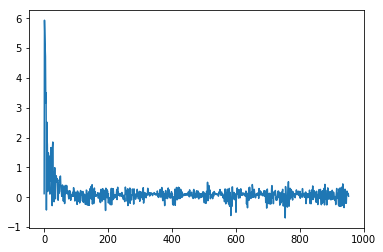

In [5]:
plt.plot(range(953), logloss)


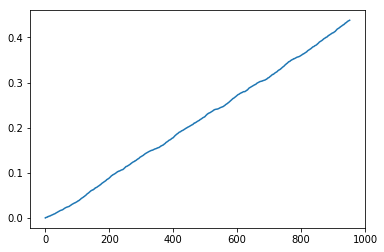

In [6]:
correctpercent = []
for f in range(len(corrects_array)):
    correctpercent.append(corrects_array[f]/len(train_dataset))

plt.plot(range(953), correctpercent)

In [22]:
len(train_dataset)
2180/4765

0.45750262329485836

In [21]:
test_dir = 'C:/Users/gdiankov/Documents/chest_xray2/test'


data_test_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(250),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])


test_dataset = torchvision.datasets.ImageFolder(test_dir, transform = data_test_transforms)
testloader = torch.utils.data.DataLoader(test_dataset, batch_size=5, shuffle=True)

In [35]:
checkpoint201_pretrained_xray2 = {'state_dict': model.state_dict(),
              'optimizer': optimizer.state_dict(),
              'criterion': criterion.state_dict(),
              'class_to_idx': train_dataset.class_to_idx}
torch.save(checkpoint201_pretrained_xray2, 'checkpoint201_chest_xray2.pth')
model.load_state_dict(checkpoint201_pretrained_xray2['state_dict'])



model.eval()

accuracy = 0
test_loss = 0
for ii, (images, labels) in enumerate(testloader):
    # Set volatile to True so we don't save the history
    images = Variable(images, requires_grad=False)
    labels = Variable(labels, requires_grad=False)

    # Move image and label tensors to the GPU, but only if GPU is available 
    if cuda:
        images, labels = images.cuda(), labels.cuda()

    output = model.forward(images)
    test_loss += float(criterion(output, labels))

    # Calculating the accuracy 
    # Model's output is log-softmax, take exponential to get the probabilities
    ps = torch.exp(output).data
    # Class with highest probability is our predicted class, compare with true label
    equality = (labels.data == ps.max(1)[1])
    # Accuracy is number of correct predictions divided by all predictions, just take the mean
    accuracy += equality.type_as(torch.FloatTensor()).sum()
    print(equality, accuracy)

tensor([ 0,  0,  0,  1,  1], dtype=torch.uint8, device='cuda:0') tensor(2.)
tensor([ 0,  0,  1,  0,  0], dtype=torch.uint8, device='cuda:0') tensor(3.)
tensor([ 0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0') tensor(3.)
tensor([ 0,  0,  1,  1,  0], dtype=torch.uint8, device='cuda:0') tensor(5.)
tensor([ 0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0') tensor(5.)
tensor([ 1,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0') tensor(6.)
tensor([ 0,  1,  1,  1,  0], dtype=torch.uint8, device='cuda:0') tensor(9.)
tensor([ 1,  0,  0,  0,  1], dtype=torch.uint8, device='cuda:0') tensor(11.)
tensor([ 1,  1,  1,  0,  0], dtype=torch.uint8, device='cuda:0') tensor(14.)
tensor([ 1,  1,  1,  1,  0], dtype=torch.uint8, device='cuda:0') tensor(18.)
tensor([ 0,  0,  1,  1,  1], dtype=torch.uint8, device='cuda:0') tensor(21.)
tensor([ 1,  0,  1,  0,  1], dtype=torch.uint8, device='cuda:0') tensor(24.)
tensor([ 0,  0,  0,  0,  0], dtype=torch.uint8, device='cuda:0') tensor(24.)
tensor

In [36]:
len(test_dataset)

624

In [7]:
model.eval()

accuracy = 0
test_loss = 0
for ii, (images, labels) in enumerate(trainloader):
    # Set volatile to True so we don't save the history
    images = Variable(images, requires_grad=False)
    labels = Variable(labels, requires_grad=False)

    # Move image and label tensors to the GPU, but only if GPU is available 
    if cuda:
        images, labels = images.cuda(), labels.cuda()

    output = model.forward(images)
    test_loss += float(criterion(output, labels))

    # Calculating the accuracy 
    # Model's output is log-softmax, take exponential to get the probabilities
    ps = torch.exp(output).data
    # Class with highest probability is our predicted class, compare with true label
    equality = (labels.data == ps.max(1)[1])
    # Accuracy is number of correct predictions divided by all predictions, just take the mean
    accuracy += equality.type_as(torch.FloatTensor()).mean()

print("Test Loss: {:.3f}.. ".format(test_loss/len(trainloader)),
      "Test Accuracy: {:.3f}".format(accuracy/len(trainloader)))

Test Loss: 1.091..  Test Accuracy: 0.281


In [5]:
len(testloader)

125

In [10]:
model

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplac

In [10]:
import pandas as pd
xray = pd.read_csv('C:/Users/gdiankov/Documents/xray/xray.csv')
xray.shape[0]
xray.head()

xray2 = xray['Finding Labels'].apply(lambda x: pd.Series(x.split('|')))
xray['Finding Labels'] = xray2[[0]]
xray.head()
xray_new = xray[['Image Index', 'Finding Labels']]
xray_new.head()
xray_new.to_csv('C:/Users/gdiankov/Documents/xray/xray_new.csv')

,Image Index,Finding Labels,Patient ID,Patient Age,Patient Gender,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y]
0,00000001_000.png,Cardiomegaly,1,58,M,2682,2749,0.143,0.143
1,00000001_001.png,Cardiomegaly|Emphysema,1,58,M,2894,2729,0.143,0.143
2,00000001_002.png,Cardiomegaly|Effusion,1,58,M,2500,2048,0.168,0.168
3,00000002_000.png,No Finding,2,81,M,2500,2048,0.171,0.171
4,00000003_000.png,Hernia,3,81,F,2582,2991,0.143,0.143


In [91]:
xray2 = xray['Finding Labels'].apply(lambda x: pd.Series(x.split('|')))
xray['Finding Labels'] = xray2[[0]]
xray.head()
xray_new = xray[['Image Index', 'Finding Labels']]
xray_new.head()
xray_new.to_csv('C:/Users/gdiankov/Documents/xray/xray_new.csv')


In [147]:
xray.index

TypeError: 'RangeIndex' object is not callable

In [222]:
dir = 'C:/Users/gdiankov/Documents/xray/train/'
dest = ''

illnesses = ['None', 'Pneumonia', 'Pneumothorax', 'Effusion', 'Infiltration', 'Nodule', 'Mass', 'Emphysema', 'Fibrosis', 'Edema',
            'Hernia', 'Pleural_Thickening', 'Atelectasis', 'Cardiomegaly', 'Consolidation']

files = os.listdir(dir)
import shutil

for i in range(len(illnesses)):
    df_temp = xray_train_new[xray_train_new['Finding Labels'].str.contains(illnesses[i])]
    df_temp = pd.Series(df_temp['Image Index'])
    dest = str(os.mkdir(os.path.join(dir,str(illnesses[i]))))
    for j in range(len(df_temp)):
        for file in files: 
            if file.endswith('.png'):
                if file == str(df_temp.iloc[j]):
                    shutil.move(os.path.join(dir,file), dest)
            
            
        


In [166]:
dir = 'C:/Users/gdiankov/Documents/xray/train/'
files = os.listdir(dir)
files[0]

'00000001_000.png'

In [207]:

df_temp = xray_train_new[xray_train_new['Finding Labels'].str.contains(illnesses[2])]
df_temp2 = df_temp['Image Index']

for i in range(len(df_temp2)):
    print(df_temp2.iloc[i])

00000013_011.png
00000013_012.png
00000013_013.png
00000013_020.png
00000013_033.png
00000013_036.png
00000013_039.png
00000071_001.png
00000090_009.png
00000103_003.png
00000103_006.png
00000116_012.png
00000118_005.png
00000118_009.png
00000118_010.png
00000118_011.png
00000211_023.png
00000231_003.png
00000246_008.png
00000261_004.png
00000275_003.png
00000285_005.png
00000285_006.png
00000296_000.png
00000296_002.png
00000322_010.png
00000368_003.png
00000372_002.png
00000372_003.png
00000404_002.png
00000416_003.png
00000416_004.png
00000416_005.png
00000416_006.png
00000416_007.png
00000417_005.png
00000467_013.png
00000467_014.png
00000468_006.png
00000468_011.png
00000468_014.png
00000468_016.png
00000468_018.png
00000491_011.png
00000491_013.png
00000493_000.png
00000502_006.png
00000547_006.png
00000608_003.png
00000631_004.png
00000643_005.png
00000643_006.png
00000643_007.png
00000732_002.png
00000744_004.png
00000758_002.png
00000827_017.png
00000827_020.png
00000832_004.p

In [157]:
illnesses = ['None', 'Pneumonia', 'Pneumothorax', 'Effusion', 'Infiltration', 'Nodule', 'Mass', 'Emphysema', 'Fibrosis', 'Edema',
            'Hernia', 'Pleural_Thickening', 'Atelectasis', 'Cardiomegaly', 'Consolidation']

import os 
for j in range(len(illnesses)):
    os.mkdir(os.path.join('C:/Users/gdiankov/Documents/xray/train/', str(illnesses[j])))


In [163]:
files = os.listdir(dir).endswith('.png')

TypeError: listdir: path should be string, bytes, os.PathLike or None, not builtin_function_or_method

In [148]:



class DatasetFolder(Dataset):

    def __init__(self, csv_path, img_path, loader, extensions, transform=None, target_transform=None):
        
        tmp_df = pd.read_csv(csv_path)
        index = tmp_df.index
        
        classes, class_to_image = self._find_classes(index)
        samples = make_dataset(img_path, class_to_image, extensions)
        if len(samples) == 0:
            raise(RuntimeError("Found 0 files in subfolders of: " + root + "\n"
                               "Supported extensions are: " + ",".join(extensions)))

        self.img_path = img_path
        self.csv_path = csv_path
        self.loader = loader
        self.extensions = extensions

        self.classes = classes
        self.class_to_idx = class_to_idx
        self.samples = samples
        self.targets = [s[1] for s in samples]

        self.transform = transform
        self.target_transform = target_transform

    def _find_classes(self, index):
        """
        Finds the class folders in a dataset.
        Args:
            dir (string): Root directory path.
        Returns:
            tuple: (classes, class_to_idx) where classes are relative to (dir), and class_to_idx is a dictionary.
        Ensures:
            No class is a subdirectory of another.
        """

        classes =  tmp_df['Finding Labels'][index]
        classes.sort()
        class_to_image = {classes[i]: tmp_df['Image Index'][i] for i in range(len(classes))}
        return classes, class_to_image

    def __getitem__(self, index):
        """
        Args:
            index (int): Index
        Returns:
            tuple: (sample, target) where target is class_index of the target class.
        """
        path, target = self.samples[index]
        sample = self.loader(img)
        if self.transform is not None:
            sample = self.transform(sample)
        if self.target_transform is not None:
            target = self.target_transform(target)

        return sample, target

    def __len__(self):
        return len(self.samples)

    def __repr__(self):
        fmt_str = 'Dataset ' + self.__class__.__name__ + '\n'
        fmt_str += '    Number of datapoints: {}\n'.format(self.__len__())
        fmt_str += '    Root Location: {}\n'.format(self.root)
        tmp = '    Transforms (if any): '
        fmt_str += '{0}{1}\n'.format(tmp, self.transform.__repr__().replace('\n', '\n' + ' ' * len(tmp)))
        tmp = '    Target Transforms (if any): '
        fmt_str += '{0}{1}'.format(tmp, self.target_transform.__repr__().replace('\n', '\n' + ' ' * len(tmp)))
        return fmt_str

    
    IMG_EXTENSIONS = ['.jpg', '.jpeg', '.png', '.ppm', '.bmp', '.pgm', '.tif']


    def pil_loader(img_path):
        # open path as file to avoid ResourceWarning (https://github.com/python-pillow/Pillow/issues/835)
        with open(path, 'rb') as f:
            img = Image.open(f)
            return img.convert('RGB')


    def accimage_loader(img_path):
        import accimage
        try:
            return accimage.Image(path)
        except IOError:
            # Potentially a decoding problem, fall back to PIL.Image
            return pil_loader(path)

    def default_loader(img_path):
        from torchvision import get_image_backend
        if get_image_backend() == 'accimage':
            return accimage_loader(path)
        else:
            return pil_loader(path)


class ImageFolder(DatasetFolder):
    """A generic data loader where the images are arranged in this way: ::
        root/dog/xxx.png
        root/dog/xxy.png
        root/dog/xxz.png
        root/cat/123.png
        root/cat/nsdf3.png
        root/cat/asd932_.png
    Args:
        root (string): Root directory path.
        transform (callable, optional): A function/transform that  takes in an PIL image
            and returns a transformed version. E.g, ``transforms.RandomCrop``
        target_transform (callable, optional): A function/transform that takes in the
            target and transforms it.
        loader (callable, optional): A function to load an image given its path.
     Attributes:
        classes (list): List of the class names.
        class_to_idx (dict): Dict with items (class_name, class_index).
        imgs (list): List of (image path, class_index) tuples
    """
    def __init__(self, csv_path, img_path, transform=None, target_transform=None,
                 loader=DatasetFolder.default_loader):
        super(ImageFolder, self).__init__(csv_path, img_path, loader, 
                                          extensions = ['.jpg', '.jpeg', '.png', '.ppm', '.bmp', '.pgm', '.tif'],
                                          transform=transform,
                                          target_transform=target_transform)
        self.imgs = self.samples

In [149]:
dset_train_new = ImageFolder(csv_path_train, img_path_train, data_transforms_train)


NameError: name 'tmp_df' is not defined

In [150]:

class Boo(ImageFolder):

    def __init__(self, csv_path, img_path, transform=None):

        tmp_df = pd.read_csv(csv_path)

        self.img_path = img_path
        self.transform = transform

        self.X_train = tmp_df['Image Index']
        self.y_train = tmp_df['Finding Labels']

    def __getitem__(self, index):
        img = Image.open(self.img_path + self.X_train[index])
        if self.transform is not None:
            img = self.transform(img)

        label = self.y_train[index]
        return img, label

    def __len__(self):
        return len(self.X_train.index)
    


In [116]:

xray_train = pd.read_csv('C:/Users/gdiankov/Documents/xray/xray_train.csv')
xray_train.head()

xray_train2 = xray_train['Finding Labels'].apply(lambda x: pd.Series(x.split('|')))
xray_train['Finding Labels'] = xray_train2[[0]]
xray_train.head()
xray_train_new = xray_train[['Image Index', 'Finding Labels']]
xray_train_new.head()
xray_train_new.to_csv('C:/Users/gdiankov/Documents/xray/xray_train_new.csv')

xray_val = pd.read_csv('C:/Users/gdiankov/Documents/xray/xray_val.csv')
xray_val.head()

xray_val2 = xray_val['Finding Labels'].apply(lambda x: pd.Series(x.split('|')))
xray_val['Finding Labels'] = xray_val2[[0]]
xray_val.head()
xray_val_new = xray_val[['Image Index', 'Finding Labels']]
xray_val_new.head()
xray_val_new.to_csv('C:/Users/gdiankov/Documents/xray/xray_val_new.csv')

In [117]:
csv_path_train = 'C:/Users/gdiankov/Documents/xray/xray_train_new.csv'
img_path_train = 'C:/Users/gdiankov/Documents/xray/train/'
csv_path_val = 'C:/Users/gdiankov/Documents/xray/xray_val_new.csv'
img_path_val = 'C:/Users/gdiankov/Documents/xray/val/'

data_transforms_train = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(250),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

data_transforms_val = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(250),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

dset_train = Boo(csv_path_train, img_path_train, data_transforms_train)
dset_val = Boo(csv_path_val, img_path_val, data_transforms_val)

In [129]:
dset_train[0]

AttributeError: 'tuple' object has no attribute 'label'

In [ ]:
xray_trainloader = torch.utils.data.DataLoader(dset_train, batch_size=5, shuffle=True)
class_names = train_dataset.classes

val_dataset = torchvision.datasets.ImageFolder(val_dir, transform = data_val_transforms)
validloader = torch.utils.data.DataLoader(val_dataset, batch_size=5, shuffle=True)